# **Regressão**

Objetivo: prever uma variável resposta (numérica e contínua) com base em uma ou mais variáveis preditoras. Em outras palavras, a partir do treinamento do modelo de ML, pode-se estimar valores para novos dados.

Usualmente, faz-se uso regressão linear, desccrita matematicamente por:

\begin{equation}
  Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_n X_n
\end{equation}

Onde:

- $Y$: variável resposta
- $\beta_i$: coeficientes
- $X_i$: variáveis preditoras


> **Pré-processamento dos dados:**

- Análise Exploratória de Dados (EDA)
- Tratamento de nulos (dados ausentes)
- Tratamento de *outliers*
- Normalização
- Codificação de variáveis categóricas
- Desbalanceamento (classificação)

## **Regressão Linear Simples**



\begin{equation}
  Y = \beta_0 + \beta_1 X_1
\end{equation}

Onde:

- $Y$: variável resposta
- $\beta_i$: coeficientes
- $X_i$: variáveis preditoras

---

> **PROBLEMA DE NEGÓCIO:**

Uma empresa de seguros de saúde está interessada em entender melhor os fatores que influenciam os custos médicos individuais de seus beneficiários. Esses custos podem variar amplamente dependendo de diversas características dos indivíduos. Logo, sugere-se o desenvolvimento de um modelo de regressão linear que permita prever os custos médicos individuais, assim a empresa pode:

1. Estimar custos futuros para novos beneficiários com base em suas características.
2. Identificar fatores de risco que aumentam significativamente os custos médicos.
3. Ajudar na criação de planos de seguro mais precisos e justos.
4. Trabalhar em novas estratégias de precificação.




In [503]:
# Bibliotecas:

# -- Manipulação de dados:
import numpy as np
import pandas as pd

# -- Visualização:
import matplotlib.pyplot as plt
import seaborn as sns

# Modelagem:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics as m

In [ ]:
!wget -q 'https://raw.githubusercontent.com/OviedoVR/ML_especializacao/main/dados/insurance_SLR.csv' -O 'insurance_SLR.csv' 

In [504]:
insurance = pd.read_csv('insurance_SLR.csv')

In [505]:
# dados
insurance.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1.053277,-0.292556,0.751079,12096.65120,1,0,1,0,1,0,0,0
1,-0.513149,-0.463983,-0.078767,4454.40265,0,1,1,0,0,1,0,0
2,0.982076,0.973867,1.580926,11264.54100,0,1,1,0,0,0,0,1
3,1.338082,-0.896240,-0.908614,11837.16000,1,0,1,0,0,0,0,1
4,0.839674,-1.352284,-0.908614,9361.32680,0,1,1,0,1,0,0,0


In [506]:
# tamanho do dataset:
insurance.shape

(150, 12)

In [507]:
insurance

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1.053277,-0.292556,0.751079,12096.65120,1,0,1,0,1,0,0,0
1,-0.513149,-0.463983,-0.078767,4454.40265,0,1,1,0,0,1,0,0
2,0.982076,0.973867,1.580926,11264.54100,0,1,1,0,0,0,0,1
3,1.338082,-0.896240,-0.908614,11837.16000,1,0,1,0,0,0,0,1
4,0.839674,-1.352284,-0.908614,9361.32680,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
145,1.338082,0.377565,-0.908614,12430.95335,1,0,1,0,1,0,0,0
146,1.266881,1.686640,-0.908614,11566.30055,0,1,1,0,1,0,0,0
147,-1.153959,-1.009431,-0.908614,2396.09590,0,1,1,0,1,0,0,0
148,0.768473,1.050968,-0.078767,9048.02730,0,1,1,0,0,0,1,0


In [508]:
# tipo de dado:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               150 non-null    float64
 1   bmi               150 non-null    float64
 2   children          150 non-null    float64
 3   charges           150 non-null    float64
 4   sex_female        150 non-null    int64  
 5   sex_male          150 non-null    int64  
 6   smoker_no         150 non-null    int64  
 7   smoker_yes        150 non-null    int64  
 8   region_northeast  150 non-null    int64  
 9   region_northwest  150 non-null    int64  
 10  region_southeast  150 non-null    int64  
 11  region_southwest  150 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 14.2 KB


In [509]:
# nulos.
insurance.isna().sum() / len (insurance) * 100

age                 0.0
bmi                 0.0
children            0.0
charges             0.0
sex_female          0.0
sex_male            0.0
smoker_no           0.0
smoker_yes          0.0
region_northeast    0.0
region_northwest    0.0
region_southeast    0.0
region_southwest    0.0
dtype: float64

In [510]:
insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
age,150.0,0.008044,0.989359,-1.509965,-0.869155,0.020860,0.893075,1.765289
bmi,150.0,-0.019204,1.061856,-2.209416,-0.797813,-0.129332,0.726570,2.630716
children,150.0,0.026347,1.014287,-0.908614,-0.908614,-0.078767,0.751079,3.240619
charges,150.0,7350.833468,3897.363292,1252.407000,4158.576475,7214.489200,11251.159975,14455.644050
sex_female,150.0,0.553333,0.498813,0.000000,0.000000,1.000000,1.000000,1.000000
sex_male,150.0,0.446667,0.498813,0.000000,0.000000,0.000000,1.000000,1.000000
smoker_no,150.0,0.986667,0.115082,0.000000,1.000000,1.000000,1.000000,1.000000
smoker_yes,150.0,0.013333,0.115082,0.000000,0.000000,0.000000,0.000000,1.000000
region_northeast,150.0,0.200000,0.401340,0.000000,0.000000,0.000000,0.000000,1.000000
region_northwest,150.0,0.226667,0.420078,0.000000,0.000000,0.000000,0.000000,1.000000


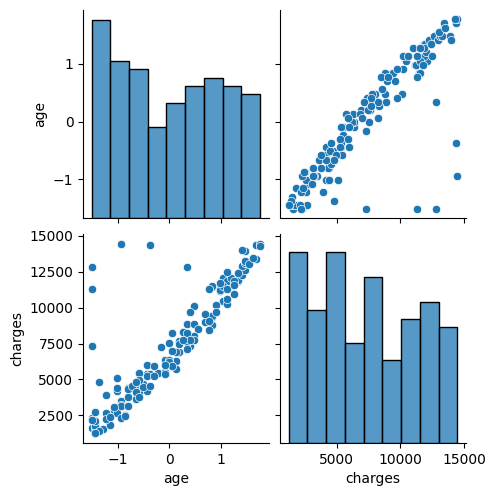

In [511]:
insurance_raw = insurance.copy()
insurance = insurance[['age', 'charges']]

sns.pairplot(data=insurance)

<ipython-input-512-f2f5267df7c7>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)


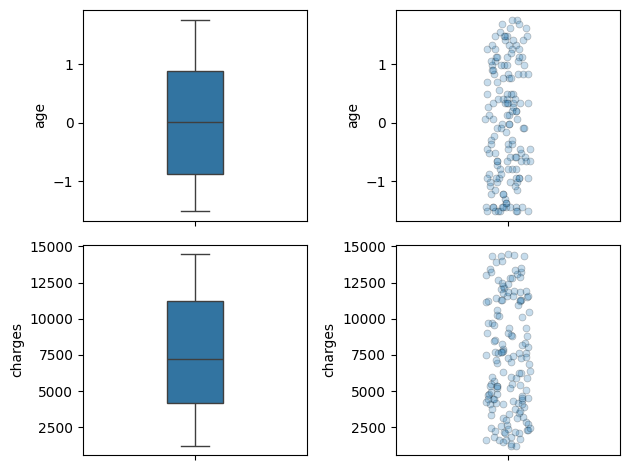

In [512]:
fig, ax = plt.subplots()
plt.subplot(2,2,1)
sns.boxplot(data=insurance, y='age', width=0.25)
plt.subplot(2,2,2)
sns.stripplot(data=insurance, y='age', alpha=0.25, linewidth=0.5, ec='k')
plt.subplot(2,2,3)
sns.boxplot(data=insurance, y='charges', width=0.25)
plt.subplot(2,2,4)
sns.stripplot(data=insurance, y='charges', alpha=0.25, linewidth=0.5, ec='k')
plt.tight_layout();

### **Normalização**

Utilizada pois é preciso lidar, muitas vezes, com escalas diferentes. Logo, é interessante padronizar, podendo utilizar:

> **Máximo/Mínimo** (MinMaxScaler)

\begin{equation}
  x' = \frac{x - x_{min}}{x_{max} - x_{min}}
\end{equation}

Onde:

- $x'$: valor normalizado
- $x$: valor original
- $x_{min}$: valor mínimo de x
- $x_{max}$: valor máximo de x

<br>

> **Média e desvio padrão** (StandardScaler)

\begin{equation}
  z = \frac{x - \mu}{\sigma}
\end{equation}

Onde:

- $z$: valor normalizado
- $x$: valor original
- $\mu$: média
- $\sigma$: desvio padrão


> No Python:

Opção manual
```python
# função lambda:
insurance['col_std'] =  insurance['col'].apply(
    lambda x: (x - insurance['col'].mean()) / insurance['col'].std()
)
```
Scikit-Learn
```python
# bibliotecas
from sklearn.preprocessing import StandardScaler

# Inicializar o StandardScaler
scaler = StandardScaler()

# Aplicar o StandardScaler à coluna 'col'
dados['col_std'] = scaler.fit_transform(dados[['col']])


```

### **Separando os dados em treino/teste**

```python
X_train, X_test, y_train, y_test = train_test_split(
   x,
   y,
   test_size=0.2,
   random_state=42
)
```

In [513]:
# dados de treino e teste:
x_train, x_test, y_train, y_test = train_test_split(
    insurance[['age']],
    insurance['charges'],
    test_size=0.25,
    random_state=40
)

# Resultado:
print(f'X treino: {x_train.shape}')
print(f'Y treino: {y_train.shape}')
print(f'X teste: {x_test.shape}')
print(f'Y teste: {y_test.shape}')

X treino: (112, 1)
Y treino: (112,)
X teste: (38, 1)
Y teste: (38,)


In [514]:
# modelagem:
model_LR = LinearRegression()
model_LR = model_LR.fit(x_train, y_train)

In [515]:
# Resumo:
model_LR.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['age'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([3654.29622309]),
 'rank_': 1,
 'singular_': array([10.02218178]),
 'intercept_': 7171.803863202119}

In [516]:
insurance['predict'] = model_LR.intercept_ + insurance['age']*model_LR.coef_
insurance['error'] = insurance['charges'] - insurance['predict']
insurance.head()

<ipython-input-516-3e42f71cae78>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance['predict'] = model_LR.intercept_ + insurance['age']*model_LR.coef_
<ipython-input-516-3e42f71cae78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance['error'] = insurance['charges'] - insurance['predict']


,age,charges,predict,error
0,1.053277,12096.65120,11020.791480,1075.859720
1,-0.513149,4454.40265,5296.606188,-842.203538
2,0.982076,11264.54100,10760.601239,503.939761
3,1.338082,11837.16000,12061.552442,-224.392442
4,0.839674,9361.32680,10240.220758,-878.893958


### **Métricas de validação**

> **Erro Quadrático Médio (MSE)**

O MSE mede a média dos quadrados dos erros, penalizando mais fortemente grandes erros.

\begin{equation}
    \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\end{equation}

Valores menores indicam previsões mais precisas, mas pode ser influenciado por outliers.

> **Erro Médio Absoluto (MAE)**
O MAE mede a média dos valores absolutos dos erros, sendo menos sensível a outliers.

\begin{equation}
  \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
\end{equation}

Valores menores indicam previsões mais precisas, com menos influência de outliers.

> **Coeficiente de Determinação (R²)**
Mede a proporção da variabilidade dos dados explicada pelo modelo, variando de 0 a 1.

\begin{equation}
  R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
\end{equation}   

Valores mais próximos de 1 indicam um melhor ajuste do modelo aos dados.


In [517]:
pred_train = model_LR.predict(x_train)
pred_test = model_LR.predict(x_test)

#treino:
r2_treino = m.r2_score(y_train, pred_train)
mae_treino = m.mean_absolute_error(y_train, pred_train)
rmse_treino = np.sqrt(m.mean_squared_error(y_train, pred_train))

#teste:
r2_teste = m.r2_score(y_test, pred_test)
mae_teste = m.mean_absolute_error(y_test, pred_test)
rmse_teste = np.sqrt(m.mean_squared_error(y_test, pred_test))

metricas = {
'Dados': ['Treino','Teste'],
'R²': [r2_treino, r2_teste],
'MAE': [mae_treino, mae_teste],
'RMSE': [rmse_treino, rmse_teste]
}

metricas = pd.DataFrame(metricas)
metricas

,Dados,R²,MAE,RMSE
0,Treino,0.820878,934.787741,1616.562517
1,Teste,0.564011,1180.933338,2634.132113


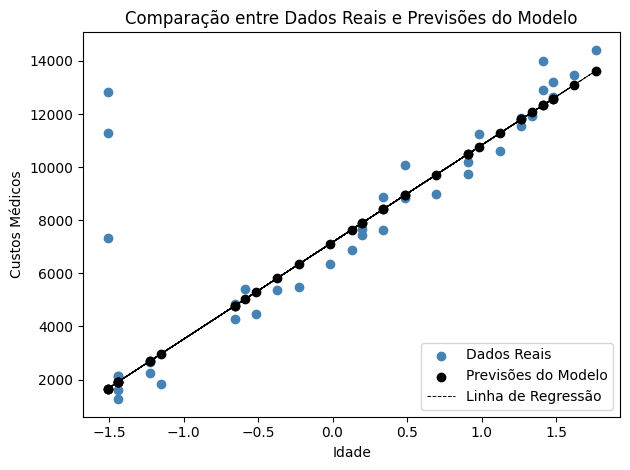

In [518]:
# Plotar os pontos de dados reais
plt.scatter(x_test, y_test, color='steelblue', label='Dados Reais')

# Plotar os valores previstos pelo modelo
plt.scatter(x_test, pred_test, color='black', label='Previsões do Modelo')

# Plotar a linha de regressão
plt.plot(x_test, pred_test, color='black', linestyle='dashed', lw=0.7, label='Linha de Regressão')

# Configurações do gráfico
plt.title('Comparação entre Dados Reais e Previsões do Modelo')
plt.xlabel('Idade')
plt.ylabel('Custos Médicos')
plt.legend()
plt.tight_layout()

## **Regressão Linear Múltipla**

In [ ]:
!wget -q 'https://raw.githubusercontent.com/OviedoVR/ML_especializacao/main/dados/insurance.csv' -O 'insurance.csv' 

In [519]:
insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


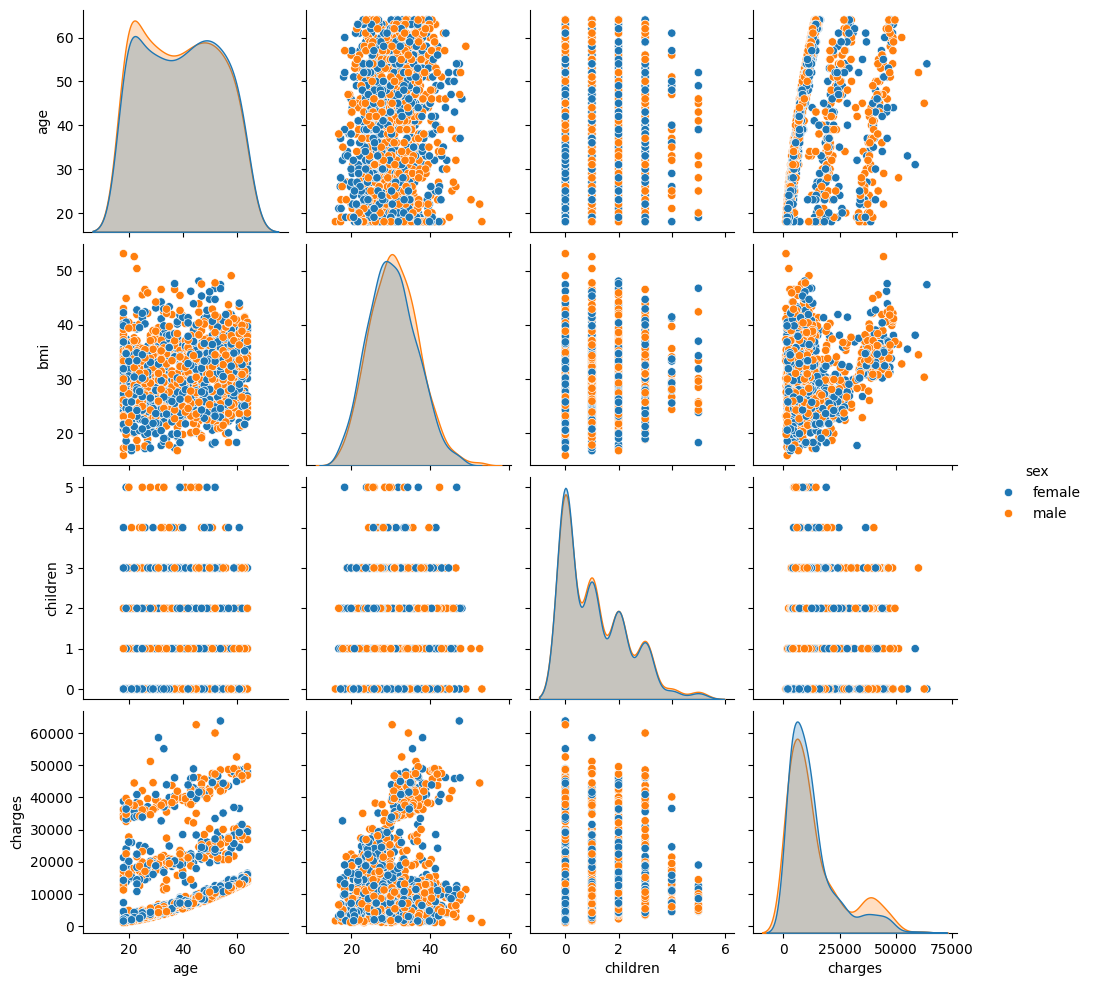

In [520]:
sns.pairplot(data=insurance, hue='sex')

In [521]:
# Encoding:
insurance = pd.get_dummies(insurance, columns = ['sex', 'smoker', 'region'])
insurance = insurance.replace(True, 1).replace(False, 0)
insurance.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [522]:
# Inicializar o StandardScaler
scaler = StandardScaler()

# Aplicar o StandardScaler à coluna 'col'
insurance['age'] = scaler.fit_transform(insurance[['age']])
insurance['bmi'] = scaler.fit_transform(insurance[['bmi']])
insurance['children'] = scaler.fit_transform(insurance[['children']])
insurance

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,16884.92400,1,0,0,1,0,0,0,1
1,-1.509965,0.509621,-0.078767,1725.55230,0,1,1,0,0,0,1,0
2,-0.797954,0.383307,1.580926,4449.46200,0,1,1,0,0,0,1,0
3,-0.441948,-1.305531,-0.908614,21984.47061,0,1,1,0,0,1,0,0
4,-0.513149,-0.292556,-0.908614,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,10600.54830,0,1,1,0,0,1,0,0
1334,-1.509965,0.206139,-0.908614,2205.98080,1,0,1,0,1,0,0,0
1335,-1.509965,1.014878,-0.908614,1629.83350,1,0,1,0,0,0,1,0
1336,-1.296362,-0.797813,-0.908614,2007.94500,1,0,1,0,0,0,0,1


In [523]:
# dados de treino e teste:
x_train, x_test, y_train, y_test = train_test_split(
    insurance.drop(['charges'], axis=1),
    insurance['charges'],
    test_size=0.3,
    random_state=40
)

# Resultado:
print(f'X treino: {x_train.shape}')
print(f'Y treino: {y_train.shape}')
print(f'X teste: {x_test.shape}')
print(f'Y teste: {y_test.shape}')

X treino: (936, 11)
Y treino: (936,)
X teste: (402, 11)
Y teste: (402,)


In [524]:
model_MLR = LinearRegression()
model_MLR = model_MLR.fit(x_train, y_train)
model_MLR.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no',
        'smoker_yes', 'region_northeast', 'region_northwest',
        'region_southeast', 'region_southwest'], dtype=object),
 'n_features_in_': 11,
 'coef_': array([ 3.69352518e+03,  1.97363170e+03,  6.90647391e+02,  2.13426268e+01,
        -2.13426268e+01, -1.19465441e+04,  1.19465441e+04,  5.72631876e+02,
        -2.42167729e+02, -1.01320957e+01, -3.20332052e+02]),
 'rank_': 8,
 'singular_': array([3.24484875e+01, 3.07414325e+01, 2.85186029e+01, 2.15886921e+01,
        1.76439745e+01, 1.52022067e+01, 1.50100830e+01, 1.45643784e+01,
        3.59476429e-15, 2.55643116e-15, 1.91622108e-15]),
 'intercept_': 20315.983939210855}

In [525]:
pred_train = model_MLR.predict(x_train)
pred_test = model_MLR.predict(x_test)

#treino:
r2_treino = m.r2_score(y_train, pred_train)
mae_treino = m.mean_absolute_error(y_train, pred_train)
rmse_treino = np.sqrt(m.mean_squared_error(y_train, pred_train))

#teste:
r2_teste = m.r2_score(y_test, pred_test)
mae_teste = m.mean_absolute_error(y_test, pred_test)
rmse_teste = np.sqrt(m.mean_squared_error(y_test, pred_test))

metricas = {
'Dados': ['Treino','Teste'],
'R²': [r2_treino, r2_teste],
'MAE': [mae_treino, mae_teste],
'RMSE': [rmse_treino, rmse_teste]
}

metricas = pd.DataFrame(metricas)
metricas

,Dados,R²,MAE,RMSE
0,Treino,0.763519,4078.167085,5951.581441
1,Teste,0.716098,4355.951515,6278.923303


In [526]:
insurance.head(2)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,16884.9240,1,0,0,1,0,0,0,1
1,-1.509965,0.509621,-0.078767,1725.5523,0,1,1,0,0,0,1,0


In [527]:
age = 30
bmi = 25
children = 2
sex_female = 0
sex_male = 1
smoker_no = 0
smoker_yes = 1
region_northeast = 1
region_northwest	= 0
region_southeast = 0
region_southwest = 0

# Normalizando idade e BMI:
age_std = ( age - insurance_raw['age'].mean()) / insurance_raw['age'].std()
bmi_std = ( bmi - insurance_raw['bmi'].mean()) / insurance_raw['bmi'].std()
children_std = ( children - insurance_raw['children'].mean()) / insurance_raw['children'].std()

# Criando um array para predição:
patient = np.array([
    age_std, bmi_std, children_std, sex_female, sex_male,
    smoker_no, smoker_yes, region_northeast,
    region_northwest, region_southeast,
    region_southwest
]).reshape(1, -1)

# Predição
prediction_patient_n =  model_MLR.predict(patient)
prediction_patient_n = round(prediction_patient_n[0], 2)
print(f'Charges: {prediction_patient_n} USD\n')

Charges: 192627.51 USD



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## **Case: tratamento de nulos com KNN**

> **K-Nearest Neighborhood (funcionamento)**

<img src="https://github.com/OviedoVR/ML_especializacao/blob/main/assets/knn-working.png?raw=true" width="600px"/>

Fonte: https://www.theclickreader.com/k-nearest-neighbours-knn-classifier/

<br>

> **Distâncias:**

<img src="https://github.com/OviedoVR/ML_especializacao/blob/main/assets/dist%C3%A2ncias-knn.png?raw=true" width="500px"/>


<br>

> **No Python:**

```python
# Bibliotecas:
from sklearn.impute import KNNImputer

# Inicializando o imputter KNN:
imputer = KNNImputer(n_neighbors=3)

# backup da coluna original
dados['col_raw'] = dados['col']
# coluna preenchida
dados['col'] = imputer.fit_transform(dados[['col_raw']])

# Visualização:
fig, ax = plt.subplots(figsize=(8,5));
plt.subplot(1,2,1);
sns.histplot(dados['col_raw']);
plt.subplot(1,2,2);
plt.tight_layout();
```

dados: [Zillow](https://www.zillow.com/fl/?searchQueryState=%7B%22pagination%22%3A%7B%7D%2C%22isMapVisible%22%3Atrue%2C%22mapBounds%22%3A%7B%22north%22%3A32.47917230710611%2C%22south%22%3A22.803517379980075%2C%22east%22%3A-77.22379045312502%2C%22west%22%3A-90.38541154687502%7D%2C%22filterState%22%3A%7B%22sort%22%3A%7B%22value%22%3A%22globalrelevanceex%22%7D%2C%22ah%22%3A%7B%22value%22%3Atrue%7D%7D%2C%22isListVisible%22%3Atrue%2C%22mapZoom%22%3A6%2C%22usersSearchTerm%22%3A%22FL%22%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A14%2C%22regionType%22%3A2%7D%5D%7D) - extraídos via API


> **PROBLEMA DE NEGÓCIO:** extraiu-se os dados de imóveis disponíveis para venda na plataforma Zillow (situada nos EUA) e se deseja utilizar esses dados para análises posteriores visando encontrar oportunidades (e.g., preço atrativo, boa localidade, rentabilidade pensando em locação, etc) ou, ainda, desenvolver um modelo de ML para agrupar imóveis com mesmas características. No entanto, a coluna `Rent Zestimate` (estimativa de aluguel informada pela própria Zillow) contém dados nulos e foi apontada como importante para os próximos passos do projeto. Assim, é necessário utilizar uma técnica de inputting que não afete consideravelemnte ou distorça a distribuição dos dados originais.

In [ ]:
!wget -q 'https://raw.githubusercontent.com/OviedoVR/ML_especializacao/main/dados/Florida_listings.csv' -O 'Florida_listings.csv' 

In [528]:
real_estate = pd.read_csv('Florida_listings.csv')
real_estate.head(2)

,rowid,zpid,Status Type,Status Text,Time On Zillow,Price,Area,Price Per Sqft,Zestimate,Zestimate Price Per Sqft,...,Bathrooms,Address,Street,City,Zipcode,Latitude,Longitude,Broker Name,Detail URL,Search Page URL
0,0,43811944,FOR_SALE,House for sale,NaN,389900,1631,239,NaN,NaN,...,2,"1331 NW 50th St, Miami, FL 33142",1331 NW 50th St,Miami,33142,"25,821117","-80,21888","Elite Realty Partners, Inc.",https://www.zillow.com/homedetails/1331-NW-50t...,https://www.zillow.com/miami-fl/2_p/?searchQue...
1,1,44162667,FOR_SALE,House for sale,4 days,350000,1924,182,334782.0,174.0,...,2,"2978 NW 28th St, Miami, FL 33142",2978 NW 28th St,Miami,33142,"25,8013","-80,24356",Sea Grove Realty,https://www.zillow.com/homedetails/2978-NW-28t...,https://www.zillow.com/miami-fl/2_p/?searchQue...


**Dicionário de dados**

| Field          | Description                                                   |
|----------------|---------------------------------------------------------------|
| zpid           | ID único de cada imóvel na Zillow                             |
| Price          | Preço do imóvel                                               |
| Rent Zestimate | Estimativa do valor do aluguel (estimado pela própria Zillow) |

In [529]:
real_estate = real_estate[['zpid', 'Price', 'Rent Zestimate']]
real_estate.head()

,zpid,Price,Rent Zestimate
0,43811944,389900,NaN
1,44162667,350000,3599.0
2,44333128,375000,2057.0
3,43847151,240000,1082.0
4,44362762,389000,NaN


In [530]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   zpid            75 non-null     int64  
 1   Price           75 non-null     int64  
 2   Rent Zestimate  57 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.9 KB


In [531]:
real_estate.isna().sum()

zpid               0
Price              0
Rent Zestimate    18
dtype: int64

In [532]:
# preencher esses dados ausentes:


In [ ]:
# Visualização:
fig, ax = plt.subplots(figsize=(8,5));
plt.subplot(1,2,1);
#sns.histplot(real_estate['_raw']);
plt.subplot(1,2,2);
#sns.histplot(real_estate['_fill']);
plt.tight_layout();

In [535]:
# Estatísticas descritivas:

In [536]:
# Estatísticas descritivas: